## Installing Pytorch Geometric and RDKit

- Pytorch Geometric => Build Graph Neural Network
- RDKit => Handle Molecule Data


_Note: Currently I didn't find a way to set a specific python version in colab. However, when installing rdkit, only specific python versions are supported... Hence it cannot be ensured that the notebook runs properly. For example Python 3.7.10 is not supported._

In [2]:
# Enforce pytorch version 1.6.0
!pip install torch
import torch
# if torch.__version__ != '1.6.0':
#   !pip uninstall torch -y
#   !pip uninstall torchvision -y
#   !pip install torch==1.6.0
#   !pip install torchvision==0.7.0

# # Check pytorch version and make sure you use a GPU Kernel
# !python -c "import torch; print(torch.__version__)"
# !python -c "import torch; print(torch.version.cuda)"
# !python --version
# !nvidia-smi

  Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.15 requires torchvision>=0.11, which is not installed.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.3.1 which is incompatible.


In [3]:
# !pip install rdkit
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
# pytorch_version = f"torch-{torch.__version__}.html"
# !pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
# !pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
# !pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
# !pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
# !pip install torch-geometric

## Looking into the dataset

In [4]:
import rdkit
from torch_geometric.datasets import MoleculeNet

# Load the ESOL dataset
data = MoleculeNet(root='.', name='ESOL')
data

Processing...
Done!


ESOL(1128)

In [7]:
# Dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Dataset nodes: ", data[0].num_nodes)
print("Dataset edges: ", data[0].num_edges)

# edge_index = graph connection
# smiles = molecules with atom
# x = node features (32 nodes have each 9 features)
# y = labels (dimesnion)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Dataset nodes:  32
Dataset edges:  68


/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


In [10]:
# investigate the features
# Shape: [num_nodes. num_nodes_features]
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [12]:
# investigate the edges in sparse COO format
# Shape:[2, num_edges]
data[0].edge_index.t()
# node 0 is connected to node 1

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [13]:
data[0].y

tensor([[-0.7700]])

## Converting SMILES to RDkit Molecules - Visualizing molecules

In [20]:
data[0]["smiles"]


'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

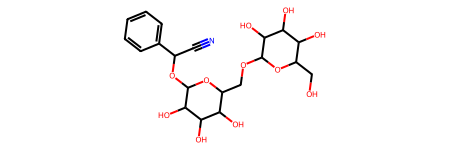

In [21]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [22]:
type(molecule)

rdkit.Chem.rdchem.Mol

## Implementing The Graph Neural network


Building a Graph Neural Network works the same way as building a Convolutional Neural Network, we simple add some layers.

The GCN simply extends torch.nn.Module.
GCNConv expects:
- in_channels = Size of each input sample.
- out_channels = Size of each output sample.

We apply three convolutional layers, which means we learn the information about 3 neighbor hops. After that we apply a pooling layer to combine the information of the individual nodes, as we want to perform graph-level prediction.

Always keep in mind that different learning problems (node, edge or graph prediction) require different GNN architectures.

For example for node-level prediction you will often encounter masks. For graph-level predictions on the other hand you need to combine the node embeddings.

In [27]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 64


class GNC(torch.nn.Module):
  def __init__(self):
    # init parent
    super(GNC, self).__init__()
    torch.manual_seed(42)

    # GCN layers
    #message passing layer
    self.initial_conv = GCNConv(data.num_features, embedding_size)
    self.conv1 = GCNConv(embedding_size, embedding_size)
    self.conv2 = GCNConv(embedding_size, embedding_size)
    self.conv3 = GCNConv(embedding_size, embedding_size)

    # output Layer
    self.out = Linear(embedding_size*2, data.num_classes)

  def forward(self, x, edge_index, batch_index):
    # first conv layer
    hidden = self.initial_conv(x, edge_index)
    hidden = F.tanh(hidden) # activation function


    # Other conv Layers
    hidden = self.conv1(hidden, edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv2(hidden, edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv3(hidden, edge_index)
    hidden = F.tanh(hidden)

    # global pooling Layer (stack diffrent aggregation)
    hidden = torch.cat([gmp(hidden, batch_index),
                        gap(hidden, batch_index)], dim =1 )
    # gmp = global max pooling
    # gap = global average/mean pooling


    # apply the final (linear) Classifier
    out = self.out(hidden)

    return out, hidden

model = GNC()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GNC(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=734, bias=True)
)
Number of parameters:  107806


## Training the GNN

In [28]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)
      # Reset gradients
      optimizer.zero_grad()
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)
      loss.backward()
      # Update using the gradients
      optimizer.step()
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 17.322711944580078
Epoch 100 | Train Loss 0.6716845035552979
Epoch 200 | Train Loss 0.8787848949432373
Epoch 300 | Train Loss 0.19937197864055634
Epoch 400 | Train Loss 0.12279752641916275
Epoch 500 | Train Loss 0.16476932168006897
Epoch 600 | Train Loss 0.3227948248386383
Epoch 700 | Train Loss 0.140389084815979
Epoch 800 | Train Loss 0.309417724609375
Epoch 900 | Train Loss 0.20474083721637726
Epoch 1000 | Train Loss 0.05753162503242493
Epoch 1100 | Train Loss 0.08585323393344879
Epoch 1200 | Train Loss 0.15993836522102356
Epoch 1300 | Train Loss 0.05404219031333923
Epoch 1400 | Train Loss 0.029134606942534447
Epoch 1500 | Train Loss 0.015849098563194275
Epoch 1600 | Train Loss 0.06258054077625275
Epoch 1700 | Train Loss 0.09299852699041367
Epoch 1800 | Train Loss 0.1672665774822235
Epoch 1900 | Train Loss 0.07866103947162628


### Visualizing the Training loss

In [33]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i,l in enumerate(losses_float)]
plt = sns.lineplot(loss_indices, losses_float)
plt

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='loss_indices', ylabel='losses_float'>

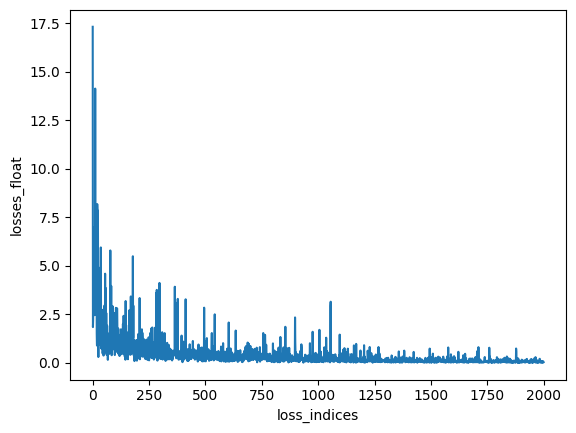

In [31]:
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i,l in enumerate(losses_float)]

# Create a pandas DataFrame from the data
import pandas as pd
df = pd.DataFrame({'loss_indices': loss_indices, 'losses_float': losses_float})

# Use the DataFrame as the 'data' argument for sns.lineplot()
plt = sns.lineplot(data=df, x='loss_indices', y='losses_float')
plt

In [34]:
import pandas as pd

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-0.590,-0.433525
1,-0.800,-0.525689
2,-3.400,-3.696044
3,-1.960,-1.369512
4,-3.401,-2.140475
...,...,...
59,-3.246,-4.214324
60,-1.030,-0.850047
61,-6.140,-6.170406
62,-4.060,-3.853591


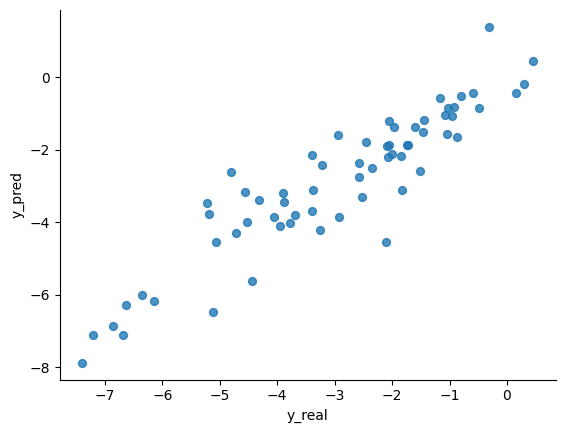

In [35]:
# @title y_real vs y_pred

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='y_real', y='y_pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)